<a href="https://colab.research.google.com/github/uervitonsantos/Exercicios_Metodos_Quantitativos/blob/main/Avalia%C3%A7%C3%A3o_M%C3%A9todos_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metodos Quantitativos

In [ ]:
# rpy2 fornece uma interface que permite executar R em processos Python.
!pip install rpy2

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install e chamada dos pacotes necessarios para o analise dos dados
if(!require(tidyverse))
install.packages("tidyverse")
if(!require(RVAideMemoire))
install.packages("nortest")
if(!require(psych))
install.packages("psych")
if(!require(rstatix))
install.packages("rstatix")
if(!require(car))
install.packages("car")
if(!require(DescTools))
install.packages("DescTools")

In [ ]:
%%R
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)
library(nortest)
library(psych)
library(rstatix)
library(car)
library(DescTools)

# 1. (1,0 ponto) A temperatura de deformação sob carga de duas formulações diferentes de tubos plásticos está sendo estudada. Duas amostras de 12 observações são preparadas usando cada formulação, as temperaturas de deformação (em °F) são relatadas a seguir:

a) Os dados apoiam a alegação de que a temperatura média de deformação sob carga para a formulação 1 é
maior que a da formulação 2? Use α = 0,05.

In [17]:
%%R
# construção das listas com os valores para cada grupo
FORMULACAO_1 <- c(212, 199, 198, 194, 213, 216, 211, 191, 200, 193, 195, 184)
FORMULACAO_2 <- c(177, 176, 198, 197, 185, 188, 206, 200, 189, 201, 197, 203)

# montando um dataFrame com os grupos selecionados
FORMULACAO <- data.frame(FORMULACAO_1, FORMULACAO_2)

#str é uma função para verificar os tipos de dados de cada grupos
str(FORMULACAO)

'data.frame':	12 obs. of  2 variables:
 $ FORMULACAO_1: num  212 199 198 194 213 216 211 191 200 193 ...
 $ FORMULACAO_2: num  177 176 198 197 185 188 206 200 189 201 ...


##Hipóteses:

H0: Os grupos possuem a mesma média

H1: Os grupos possuem médias diferente

In [21]:
%%R
# Para comparar a média de cada um desses dois grupos, usamos a função t.test().
# http://rstudio-pubs-static.s3.amazonaws.com/408638_6679293d4c7a415eaebe00faa3aea0cb.html
t.test(FORMULACAO_1, FORMULACAO_2, var.equal = TRUE, conf.level  = 0.95)


	Two Sample t-test

data:  FORMULACAO_1 and FORMULACAO_2
t = 1.8053, df = 22, p-value = 0.08473
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.103433 15.936766
sample estimates:
mean of x mean of y 
 200.5000  193.0833 



In [19]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
FORMULACAO <- FORMULACAO %>% pivot_longer(cols = everything(), names_to = "FORMULACAO")
FORMULACAO

# A tibble: 24 × 2
   FORMULACAO   value
   <chr>        <dbl>
 1 FORMULACAO_1   212
 2 FORMULACAO_2   177
 3 FORMULACAO_1   199
 4 FORMULACAO_2   176
 5 FORMULACAO_1   198
 6 FORMULACAO_2   198
 7 FORMULACAO_1   194
 8 FORMULACAO_2   197
 9 FORMULACAO_1   213
10 FORMULACAO_2   185
# … with 14 more rows
# ℹ Use `print(n = ...)` to see more rows


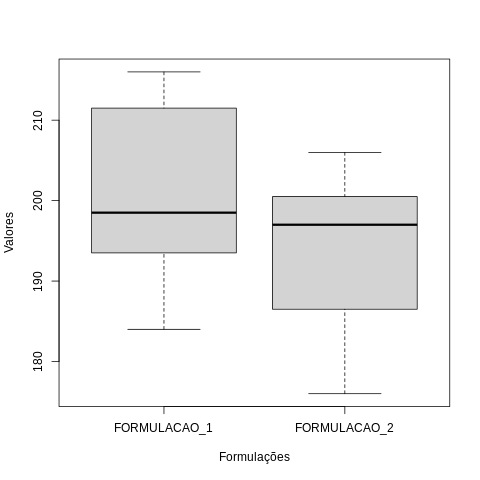

In [20]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ FORMULACAO, data = FORMULACAO, ylab="Valores", xlab="Formulações")

O teste-t para as duas amostras (Formulação 1 e Formulaçao 2), mostrou que há diferença entre as médias com (t(22) = 1.81; P = 0.08473). Portanto podemos rejeitar a H1

# 2. (1,0 ponto) O fabricante de um produto está investigando a resistência à ruptura de uma nova fibra sintética, que será utilizada para confecção de camisas de uso masculino. A resistência é geralmente afetada pela porcentagem de algodão usado na mistura de materiais para a fibra. O fabricante realizou um experimento com cinco níveis do conteúdo de algodão e reproduziu o experimento cinco vezes. Os dados estão apresentados na tabela a seguir.

a) Há evidências para apoiar a alegação de que a porcentagem de algodão afeta a média de resistência da nova
fibra? Use α = 0,05.

b) Se necessário, faça comparações entre os pares de médias. Que conclusões você pode tirar?

In [22]:
%%R
# construção das listas com os valores para cada grupo
Algodao_15 <- c(7,7,15,11,9)
Algodao_20 <- c(12,17,12,18,18)
Algodao_25 <- c(14,19,19,18,18)
Algodao_30 <- c(19,25,22,19,23)
Algodao_35 <- c(7,10,11,15,11)

# montando um dataFrame com os grupos selecionados
algodao <- data.frame(Algodao_15, Algodao_20, Algodao_25, Algodao_30, Algodao_35)

#str é uma função para verificar os tipos de dados de cada grupos
str(algodao)

'data.frame':	5 obs. of  5 variables:
 $ Algodao_15: num  7 7 15 11 9
 $ Algodao_20: num  12 17 12 18 18
 $ Algodao_25: num  14 19 19 18 18
 $ Algodao_30: num  19 25 22 19 23
 $ Algodao_35: num  7 10 11 15 11


In [23]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
algodao <- algodao %>% pivot_longer(cols = everything(), names_to = "algodao")
algodao

# A tibble: 25 × 2
   algodao    value
   <chr>      <dbl>
 1 Algodao_15     7
 2 Algodao_20    12
 3 Algodao_25    14
 4 Algodao_30    19
 5 Algodao_35     7
 6 Algodao_15     7
 7 Algodao_20    17
 8 Algodao_25    19
 9 Algodao_30    25
10 Algodao_35    10
# … with 15 more rows
# ℹ Use `print(n = ...)` to see more rows


In [25]:
%%R
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
anova_algodao <- aov(value ~ algodao, data = algodao, conf.level  = 0.95)
summary(anova_algodao)

            Df Sum Sq Mean Sq F value   Pr(>F)    
algodao      4  475.8  118.94   14.76 9.13e-06 ***
Residuals   20  161.2    8.06                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(anova_algodao, "algodao", ordered = TRUE, conf.level=0.95)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ algodao, data = algodao, conf.level = 0.95)

$algodao
                      diff        lwr       upr     p adj
Algodao_35-Algodao_15  1.0 -4.3729583  6.372958 0.9797709
Algodao_20-Algodao_15  5.6  0.2270417 10.972958 0.0385024
Algodao_25-Algodao_15  7.8  2.4270417 13.172958 0.0025948
Algodao_30-Algodao_15 11.8  6.4270417 17.172958 0.0000190
Algodao_20-Algodao_35  4.6 -0.7729583  9.972958 0.1162970
Algodao_25-Algodao_35  6.8  1.4270417 12.172958 0.0090646
Algodao_30-Algodao_35 10.8  5.4270417 16.172958 0.0000624
Algodao_25-Algodao_20  2.2 -3.1729583  7.572958 0.7372438
Algodao_30-Algodao_20  6.2  0.8270417 11.572958 0.0188936
Algodao_30-Algodao_25  4.0 -1.3729583  9.372958 0.2101089



O teste da ANOVA retorna um Valor de P = 9.13e-06. Mostrando que há deferença em pelo menos um dos grupos.
O teste de Tukey mostro que a diferenças significativas entre a amostra de Algodão (20 - 35),(25 - 20),(30 -25)

# 3. (2,0 pontos) A resistência à tração do cimento Portland está sendo estudada. Quatro diferentes técnicas de mistura foram usadas e os seguintes dados coletados:

a) Avalie se os pressupostos para a análise de variância são satisfeitos.

b) Teste a hipótese de que a técnica de mistura afeta a resistência do cimento. Use α = 0,05 e justifique a
escolha da técnica utilizada (ANOVA ou Kruskal-Wallis).

c) Se necessário, faça um teste de comparações múltiplas.

In [31]:
%%R
# construção das listas com os valores para cada grupo
mistrura_1 <- c(3129, 3000, 2865, 2890)
mistrura_2 <- c(3200, 3300, 2975, 3150)
mistrura_3 <- c(2800, 2900, 2985, 3050)
mistrura_4 <- c(2600, 2700, 2600, 2765)

# montando um dataFrame com os grupos selecionados
mistura <- data.frame(mistrura_1, mistrura_2, mistrura_3, mistrura_4)

#str é uma função para verificar os tipos de dados de cada grupos
str(mistura)

'data.frame':	4 obs. of  4 variables:
 $ mistrura_1: num  3129 3000 2865 2890
 $ mistrura_2: num  3200 3300 2975 3150
 $ mistrura_3: num  2800 2900 2985 3050
 $ mistrura_4: num  2600 2700 2600 2765


In [32]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
mistura <- mistura %>% pivot_longer(cols = everything(), names_to = "mistura")
mistura

# A tibble: 16 × 2
   mistura    value
   <chr>      <dbl>
 1 mistrura_1  3129
 2 mistrura_2  3200
 3 mistrura_3  2800
 4 mistrura_4  2600
 5 mistrura_1  3000
 6 mistrura_2  3300
 7 mistrura_3  2900
 8 mistrura_4  2700
 9 mistrura_1  2865
10 mistrura_2  2975
11 mistrura_3  2985
12 mistrura_4  2600
13 mistrura_1  2890
14 mistrura_2  3150
15 mistrura_3  3050
16 mistrura_4  2765


In [34]:
%%R
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
anova_mistura <- aov(value ~ mistura, data = mistura, conf.level  = 0.95)
summary(anova_mistura)

            Df Sum Sq Mean Sq F value   Pr(>F)    
mistura      3 489740  163247   12.73 0.000489 ***
Residuals   12 153908   12826                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [35]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(anova_mistura, "mistura", ordered = TRUE, conf.level=0.95)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ mistura, data = mistura, conf.level = 0.95)

$mistura
                        diff        lwr      upr     p adj
mistrura_3-mistrura_4 267.50   29.74971 505.2503 0.0261838
mistrura_1-mistrura_4 304.75   66.99971 542.5003 0.0115923
mistrura_2-mistrura_4 490.00  252.24971 727.7503 0.0002622
mistrura_1-mistrura_3  37.25 -200.50029 275.0003 0.9652776
mistrura_2-mistrura_3 222.50  -15.25029 460.2503 0.0693027
mistrura_2-mistrura_1 185.25  -52.50029 423.0003 0.1493561



# 4. (1,0 ponto) Em um teste com um tipo de fusível, 9 peças foram testadas com 25% de sobrecarga. O tempo médio até queimar dessa amostra foi x 19, 2 minutos, com desvio-padrão populacional conhecido   2, 4 minutos. Sabendo que a população é normal calcule o intervalo de confiança 95% para a média μ da população.

# 5. (1,0 ponto) A eficácia da publicidade de duas marcas rivais de café foi comparada. Os participantes avaliaram
anúncios das duas marcas e classificaram a probabilidade geral de comprar o produto (de 0 a 10, com 10 sendo
"definitivamente vai comprar" o produto"). Metade dos participantes deu notas para um dos produtos, a outra metade
deu classificações para o outro produto.

Determine o teste a ser usado para verificar se existe diferença entre os dois grupos, realize o teste escolhido com 95% de confiança e discuta o significado dos resultados.

# 6. (1,0 ponto) Os dados a seguir indicam a soma de notas obtidas por um grupo de alunos, homens e mulheres, do curso de engenharia. Use o teste de Mann-Whitney para determinar se os valores diferem entre homens e mulheres.Investigue se os empates observados interferem no resultado.

# 7. (1,0 ponto) O batimento cardíaco de um grupo de sete alunos, em batimento por minuto (bpm), foi aferido antes do exercício (I), imediatamente após o exercício (II), e 5 minutos após o exercício (III). Use o teste estatístico de Friedman para avaliar as diferenças entre os valores nas três situações. Aplique o teste de comparações múltiplas não paramétrico, se necessário.

# 8. (1,0 ponto) Use o teste de comparações múltiplas da menor diferença significativa para avaliar os resultados do exercício a seguir. Antes, faça o teste de Kruskall-Wallis.

# 9. (1,0 ponto) Considere os dados abaixo sobre os 574 gols marcados nas 232 partidas em Copas do Mundo de futebol, desde a Copa do Uruguai em 1930 até a Copa do Japão/Coreia em 2002. Os dados foram organizados em classes que representam intervalos de tempo entre gols sucessivos. Utilizando o teste Qui-quadrado verifique aderência ao modelo de Exponencial.

Dica: a distribuição exponencial é usada para descrever intervalos de tempo entre eventos sucessivos e possui a
seguinte expressão: f(x) = λ*e-λx